<a href="https://colab.research.google.com/github/Shavrau/AVA1-AM-Spotify/blob/main/NeuroAnaliseSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregamento da base Digest

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

# Carregar os dados
with open('/content/drive/MyDrive/ColabNotebooks/spotify_model.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2949, 3), (2949,), (1264, 3), (1264,))

In [4]:
from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

GaussianNB()


Relatório de Classificação:

                         precision    recall  f1-score   support

      Alta Popularidade       0.83      1.00      0.91        10
      Artistas de Nicho       0.98      0.96      0.97       328
     Descobertas Locais       0.99      0.97      0.98       230
     Emergentes Globais       0.75      0.88      0.81        43
Estrelas Internacionais       0.75      0.75      0.75         8
    Mainstream Regional       0.97      0.93      0.95       402
              Nova Cena       0.89      0.92      0.91        92
            Promissores       0.84      0.93      0.88       149
          Superestrelas       0.00      0.00      0.00         2

               accuracy                           0.94      1264
              macro avg       0.78      0.82      0.79      1264
           weighted avg       0.94      0.94      0.94      1264



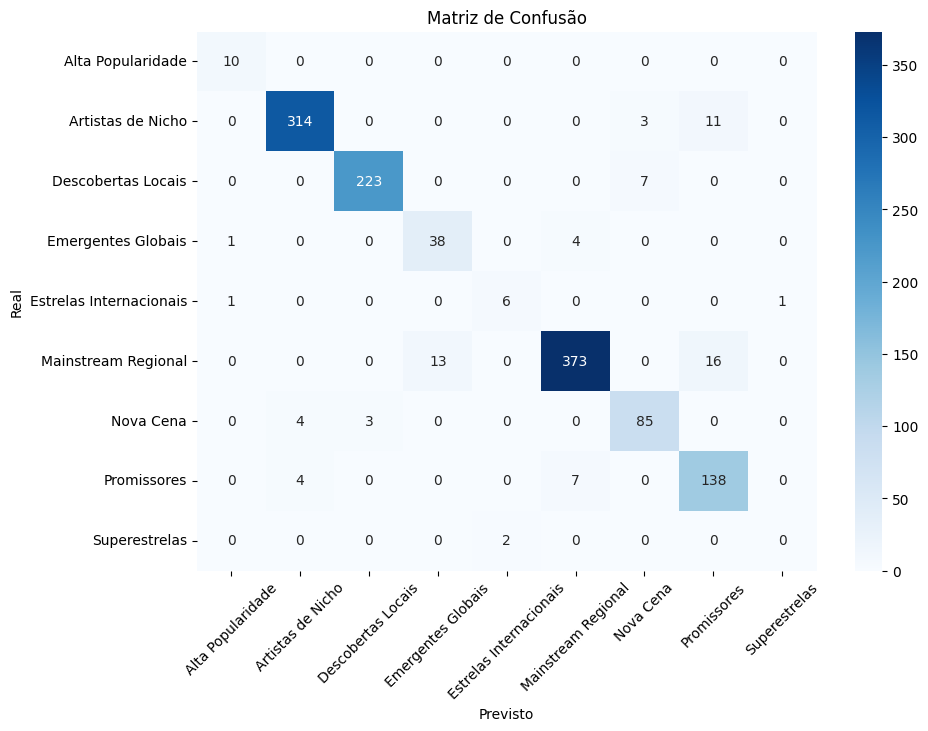

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo_nb.predict(X_test)

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=modelo_nb.classes_))

plt.figure(figsize=(10, 7))
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=modelo_nb.classes_,
            yticklabels=modelo_nb.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()